Marcos Gonzalez  
Homework #14  
3/25/21

# Homework 14

This homework uses the Green taxi data from Homework 2.  The 2020 green taxi trip data from NYC Open Data was filtered to only be trips with a pickup date and time on Feb. 4, 2020. 

Filtered trip data URL: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv)

We will try to predict which trips involve tolls using only the length of the trip.

**Answer all questions in the homework, including ones that require written answers.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf


%matplotlib inline

### Question 1: Loading and cleaning the data

Load the data into Python, and clean it as follows:
* create a new column call `paid_toll` that contains a 1 if the value in the `tolls_amount` column is greater than 0 and a 0 otherwise.  Hint:  See Lab 1, Section 6.
* create a new dataframe (or change the current one) that only contains the columns `trip_distance` and `paid_toll`.


In [2]:
def is_positive(x):
  if x > 0:
    return 1
  else:
    return 0

In [3]:
taxi = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv")
taxi["paid_toll"] = taxi["tolls_amount"].apply(is_positive)
taxi2 = taxi[["trip_distance","paid_toll"]]
taxi2

,trip_distance,paid_toll
0,1.21,0
1,3.28,0
2,0.68,0
3,1.89,0
4,12.80,0
...,...,...
13976,0.64,0
13977,1.77,0
13978,1.80,0
13979,0.69,0


### Question 2: Logistic regression

2a) Plot a scatterplot with `trip_distance` on the x axis and `paid_toll` on the y axis.  Do you think our model to predict whether a taxi customer paid a toll based on trip distance will work?  Why or why not?

Text(0.5, 1.0, 'Paid toll based on trip distance')

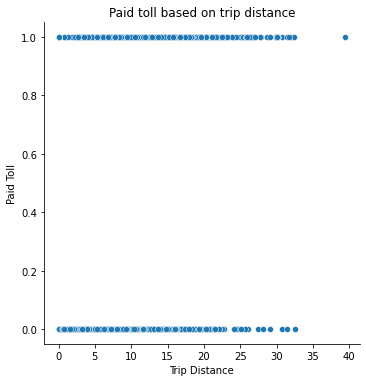

In [4]:
sns.relplot(x = "trip_distance", y = "paid_toll", data = taxi2)
plt.xlabel("Trip Distance")
plt.ylabel("Paid Toll")
plt.title("Paid toll based on trip distance")

I don't believe our model to predict whether a taxi customer paid a toll based on trip distance will work due to the fact that it's kinda hard to tell what is going on since the points are all on top of each other.

2b) Create a logistic model where `paid_toll` is the independent variable and `trip_distance` is the dependent variable.

In [5]:
logit_model = smf.logit('paid_toll ~ trip_distance',taxi2).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.129203
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              paid_toll   No. Observations:                13981
Model:                          Logit   Df Residuals:                    13979
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                  0.3803
Time:                        20:59:19   Log-Likelihood:                -1806.4
converged:                       True   LL-Null:                       -2914.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.0030      0.088    -57.134      0.000      -5.175      -4.831
trip_distance     0.3262      0.008     39.084      0.000       0.310       0.343
=================================================================================
"""

2c)  What is the R-squared value for your logistic model?  What does it suggest about the fit of the model?

R-squared value: 0.3803 which is about 40% so it doesn't seem like a good fit.

2d)  What is the equation of your logistic regression model?  The equation below is written in Latex, which is a system for typing math equations.  Double click on this cell, and replace the part of the equation that says "reg" to finish the formula.  "run" this cell (as you would a code cell) when you are finished.

$$y = \frac{1}{1 + e^{-(-5.0030 - 0.3262x1)}}$$

2e) Plot the logistic regression model line on a scatterplot of the data.  You can use any method/package to do this.

In [6]:
x2 = np.linspace(0,210,250)
x2

array([  0.        ,   0.84337349,   1.68674699,   2.53012048,
         3.37349398,   4.21686747,   5.06024096,   5.90361446,
         6.74698795,   7.59036145,   8.43373494,   9.27710843,
        10.12048193,  10.96385542,  11.80722892,  12.65060241,
        13.4939759 ,  14.3373494 ,  15.18072289,  16.02409639,
        16.86746988,  17.71084337,  18.55421687,  19.39759036,
        20.24096386,  21.08433735,  21.92771084,  22.77108434,
        23.61445783,  24.45783133,  25.30120482,  26.14457831,
        26.98795181,  27.8313253 ,  28.6746988 ,  29.51807229,
        30.36144578,  31.20481928,  32.04819277,  32.89156627,
        33.73493976,  34.57831325,  35.42168675,  36.26506024,
        37.10843373,  37.95180723,  38.79518072,  39.63855422,
        40.48192771,  41.3253012 ,  42.1686747 ,  43.01204819,
        43.85542169,  44.69879518,  45.54216867,  46.38554217,
        47.22891566,  48.07228916,  48.91566265,  49.75903614,
        50.60240964,  51.44578313,  52.28915663,  53.13

In [7]:
p2 = logit_model.params
reg2 = p2["Intercept"] + p2["trip_distance"]*x2
reg2

array([-5.00301060e+00, -4.72787770e+00, -4.45274479e+00, -4.17761189e+00,
       -3.90247899e+00, -3.62734609e+00, -3.35221318e+00, -3.07708028e+00,
       -2.80194738e+00, -2.52681448e+00, -2.25168158e+00, -1.97654867e+00,
       -1.70141577e+00, -1.42628287e+00, -1.15114997e+00, -8.76017063e-01,
       -6.00884161e-01, -3.25751259e-01, -5.06183564e-02,  2.24514546e-01,
        4.99647448e-01,  7.74780351e-01,  1.04991325e+00,  1.32504616e+00,
        1.60017906e+00,  1.87531196e+00,  2.15044486e+00,  2.42557776e+00,
        2.70071067e+00,  2.97584357e+00,  3.25097647e+00,  3.52610937e+00,
        3.80124228e+00,  4.07637518e+00,  4.35150808e+00,  4.62664098e+00,
        4.90177389e+00,  5.17690679e+00,  5.45203969e+00,  5.72717259e+00,
        6.00230549e+00,  6.27743840e+00,  6.55257130e+00,  6.82770420e+00,
        7.10283710e+00,  7.37797001e+00,  7.65310291e+00,  7.92823581e+00,
        8.20336871e+00,  8.47850162e+00,  8.75363452e+00,  9.02876742e+00,
        9.30390032e+00,  

In [8]:
y2 = 1/(1 + np.exp(-reg2))

Text(0.5, 1.0, 'Paid toll based on trip distance')

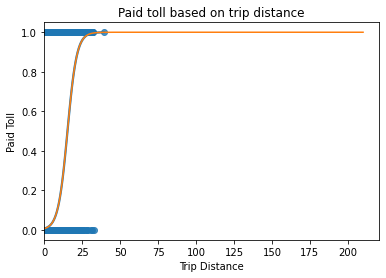

In [9]:
sns.regplot(x = "trip_distance", y = "paid_toll", data = taxi2, logistic = True)
plt.plot(x2,y2)
plt.xlabel("Trip Distance")
plt.ylabel("Paid Toll")
plt.title("Paid toll based on trip distance")

2f) Compute the confusion matrix for your logistic regression model.  How many true positives are there?  How many true negative?  How many false positives?  How many false negatives?  

Based on the confusion matrix and the R-squared value, how good of a fit is your model?

In [11]:
logit_model.pred_table()

array([[13110.,   124.],
       [  493.,   254.]])

I think there are about 254 true positives, 13110 true negatives, 124 false positives and 493 false negatives. I'm not really sure of how good of a fit this model is.